In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# me=train_data.mean(axis=0)
# st=train_data.std(axis=0)

# train_data=train_data=me
# train_data=train_data/st

# test_data=test_data-me
# test_data=test_data/st
mean=train_data.mean(axis=0)
train_data=train_data-mean
std=train_data.std(axis=0)
train_data=train_data/std
test_data=test_data-mean
test_data=test_data/std

In [4]:
#현범님코드
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

from keras.optimizers import Adam

model.compile(loss='mse', optimizer=Adam, metrics=['mse'])

#효린님
model.compile(loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])
model.summary()

In [5]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(train_data,train_labels, batch_size=32, epochs=300, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
11/11 [==============================] - 1s 16ms/step - loss: 535.2949 - mse: 535.2949 - val_loss: 558.1981 - val_mse: 558.1981
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 458.0110 - mse: 458.0110 - val_loss: 475.4041 - val_mse: 475.4041
Epoch 3/300
11/11 [==============================] - 0s 4ms/step - loss: 378.2797 - mse: 378.2797 - val_l

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

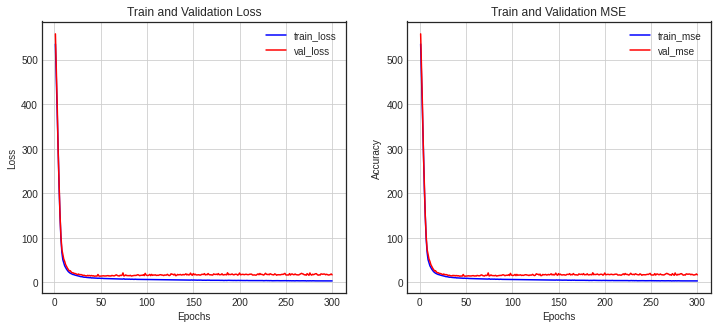

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mse']
val_mae = history_dict['val_mse']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mse')
ax2.plot(epochs, val_mae, 'r-', label='val_mse')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
print(np.round(test_labels[:10]))
# [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]

test_predictions = model.predict(test_data[:10]).flatten()
print(np.round(test_predictions))
# [ 8. 19. 23. 29. 26. 21. 26. 23. 19. 19.]

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 8. 19. 22. 33. 27. 23. 28. 22. 19. 20.]


이게 맞나?
한 90번쯤 학습시키니까 얼추 맞아 떨어지는것 같기도?
맞긴 개뿔 비슷한듯하면서 다 엇나가누 

야발 내가 쳐도 저것보단 잘치겠다 란 소리가괜히 있는게 아니구나
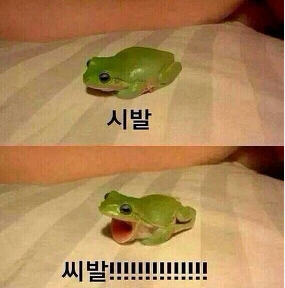
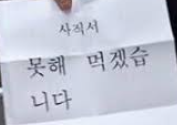
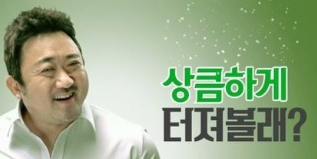
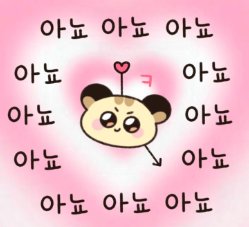
3가지 종류가 있었는데 분명 첫번쨰 문제만으로 내 정신은 터졌다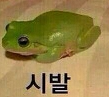
